In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import colors as mcolors

In [34]:
# simulate a poisson(lambda) branching process over n generations
# return list of population size at each generation
def branching_process(lam, gen):
    Z = [1]
    for i in range(1,gen):
        x = 0
        if Z[i-1] > 0:
            for i in range(Z[i-1]):
                x += np.random.poisson(lam)
        Z.append(x)
    return Z

print(branching_process(4,10))
mean=pow(4,10)
print('expectation of 10th generation=', mean)
variance = pow(4,9)*((pow(4,10)-1)*4)/(4-1)
print('Variance of 10th generation=',variance)

#determine whether a family goes extinct
#if final generation is size 0
#return True
def ifextinct(Z):
    final_pop = Z[len(Z)-1]
    if final_pop == 0:
        return True
    return False
 
# run 1000 branching processes
# return proportion of extinct populations 
# to approximate extinction probability
def prob_extinction(lam):
    n = 10
    trials = 1000
    results = 0
    for i in range(0,trials):
        pop_time = branching_process(lam,n)
        if ifextinct(pop_time):
            results += 1
    return float(results)/trials

print ('Probability of extinction:',prob_extinction(4))


[1, 5, 21, 78, 316, 1255, 5095, 20631, 82327, 329806]
expectation of 10th generation= 1048576
Variance of 10th generation= 366503526400.0
Probability of extinction: 0.023


In [36]:
# simulate a binomial(n,p) branching process over n generations
# return list of population size at each generation
def branching_process1(n,p, gen):
    Z = [1]
    for i in range(1,gen):
        x = 0
        if Z[i-1] > 0:
            for i in range(Z[i-1]):
                x += np.random.binomial(n,p)
        Z.append(x)
    return Z

print(branching_process1(3,0.5,10))
mean_binom=pow(3*0.5,10)
print('expectation of 10th generation=',mean_binom)
var_binom = pow(3*0.5,9)*(pow(3*0.5,10)-1)*(3*0.5*0.5)/((3*0.5)-1)
print('Variance of 10th generation=',var_binom)

def ifextinct1(Z):
    final_pop = Z[len(Z)-1]
    if final_pop == 0:
        return True
    return False

def prob_extinction1(n,p):
    n1 = 10
    trials = 1000
    results = 0
    for i in range(0,trials):
        pop_time = branching_process1(n,p,n1)
        if ifextinct1(pop_time):
            results += 1
    return float(results)/trials

print ('Probability of extinction:',prob_extinction1(3,0.5))


[1, 2, 3, 3, 3, 3, 3, 6, 8, 11]
expectation of 10th generation= 57.6650390625
Variance of 10th generation= 3267.591691017151
Probability of extinction: 0.23


In [38]:
# simulate a geometric(p1) branching process over n generations
# return list of population size at each generation
def branching_process2(p1, gen):
    Z = [1]
    for i in range(1,gen):
        x = 0
        if Z[i-1] > 0:
            for i in range(Z[i-1]):
                x += np.random.geometric(p1)
        Z.append(x)
    return Z

print(branching_process2(0.6,10))
mean_geom=1/(pow(0.6,10))
print('expectation of 10th generation=',mean_geom)
var_geom = pow((1/0.6),9)*(pow((1/0.6),10)-1)*(0.4/(0.6*0.6))/((1/0.6)-1)
print('Variance of 10th generation=',var_geom)

def ifextinct2(Z):
    final_pop = Z[len(Z)-1]
    if final_pop == 0:
        return True
    return False

def prob_extinction2(p1):
    n = 10
    trials = 1000
    results = 0
    for i in range(0,trials):
        pop_time = branching_process2(p1,n)
        if ifextinct2(pop_time):
            results += 1
    return float(results)/trials


print ('Probability of extinction:',prob_extinction2(0.6))

[1, 1, 1, 1, 1, 1, 2, 3, 6, 10]
expectation of 10th generation= 165.3817168792021
Variance of 10th generation= 27185.730561033353
Probability of extinction: 0.0


       s    G(s)
0   0.00  0.1600
1   0.05  0.1849
2   0.10  0.2116
3   0.15  0.2401
4   0.20  0.2704
5   0.25  0.3025
6   0.30  0.3364
7   0.35  0.3721
8   0.40  0.4096
9   0.45  0.4489
10  0.50  0.4900
11  0.55  0.5329
12  0.60  0.5776
13  0.65  0.6241
14  0.70  0.6724
15  0.75  0.7225
16  0.80  0.7744
17  0.85  0.8281
18  0.90  0.8836
19  0.95  0.9409
20  1.00  1.0000


Text(0.5, 1.0, 's VS G(s)')

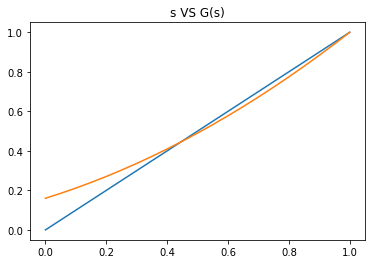

In [7]:
s=np.arange(0,1.05,.05)
df = pd.DataFrame(data=s, index=None, columns=['s'])
df
df['G(s)'] = ""
df

df['G(s)'] = ((4/25)+(12*s/25)+(9*(s*s))/25)
print (df)
plt.plot(s,df)
plt.title('s VS G(s)')


       A         B
0   0.00  0.125000
1   0.05  0.144703
2   0.10  0.166375
3   0.15  0.190109
4   0.20  0.216000
5   0.25  0.244141
6   0.30  0.274625
7   0.35  0.307547
8   0.40  0.343000
9   0.45  0.381078
10  0.50  0.421875
11  0.55  0.465484
12  0.60  0.512000
13  0.65  0.561516
14  0.70  0.614125
15  0.75  0.669922
16  0.80  0.729000
17  0.85  0.791453
18  0.90  0.857375
19  0.95  0.926859
20  1.00  1.000000


Text(0.5, 1.0, 's VS G(s)')

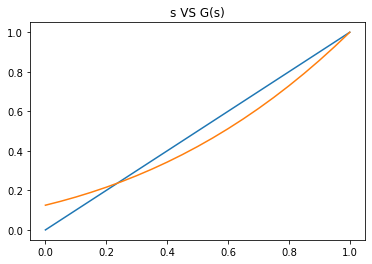

In [8]:
df1 = pd.DataFrame(data=s, index=None, columns=['A'])
df1
df1['B'] = ""
df1
#Binomial
df1['B'] = ((0.5+0.5*s)*(0.5+0.5*s)*(0.5+0.5*s))
print (df1)
plt.plot(s,df1)

plt.title('s VS G(s)')

       s      G(s)
0   0.00  0.000000
1   0.05  0.030612
2   0.10  0.062500
3   0.15  0.095745
4   0.20  0.130435
5   0.25  0.166667
6   0.30  0.204545
7   0.35  0.244186
8   0.40  0.285714
9   0.45  0.329268
10  0.50  0.375000
11  0.55  0.423077
12  0.60  0.473684
13  0.65  0.527027
14  0.70  0.583333
15  0.75  0.642857
16  0.80  0.705882
17  0.85  0.772727
18  0.90  0.843750
19  0.95  0.919355
20  1.00  1.000000


Text(0.5, 1.0, 's VS G(s)')

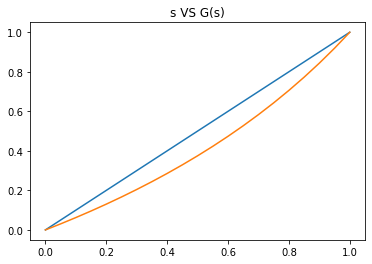

In [9]:

df2 = pd.DataFrame(data=s, index=None, columns=['s'])
df2
df2['G(s)'] = ""
df2
#Geometric
df2['G(s)'] = (0.6*s/(1-0.4*s))
        
print (df2)
plt.plot(s,df2)

plt.title('s VS G(s)')

       s      G(s)
0   0.00  0.018316
1   0.05  0.022371
2   0.10  0.027324
3   0.15  0.033373
4   0.20  0.040762
5   0.25  0.049787
6   0.30  0.060810
7   0.35  0.074274
8   0.40  0.090718
9   0.45  0.110803
10  0.50  0.135335
11  0.55  0.165299
12  0.60  0.201897
13  0.65  0.246597
14  0.70  0.301194
15  0.75  0.367879
16  0.80  0.449329
17  0.85  0.548812
18  0.90  0.670320
19  0.95  0.818731
20  1.00  1.000000


Text(0.5, 1.0, 's VS G(s)')

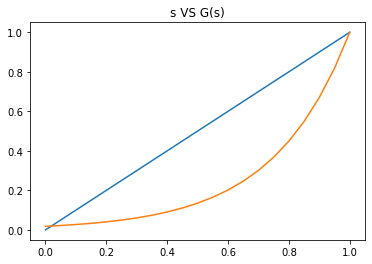

In [10]:

df3 = pd.DataFrame(data=s, index=None, columns=['s'])
df3
df3['G(s)'] = ""
df3
#poisson
df3['G(s)']= (np.exp(4*(s-1)))
        
print (df3)
plt.plot(s,df3)

plt.title('s VS G(s)')